In [48]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt, cv2, keras, seaborn, os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
w, h = 50, 50
FOLDER_PATH = './assets/'

In [ ]:
(X_MNIST_1, y_MNIST_1), (X_MNIST_2, y_MNIST_2) = mnist.load_data()

print(f'X_MNIST_1 : {X_MNIST_1.shape}\ny_MNIST_1 : {y_MNIST_1.shape}\n\nX_MNIST_2: {X_MNIST_2.shape}\ny_MNIST_2: {y_MNIST_2.shape}')

X_MNIST_1 : (60000, 28, 28)
y_MNIST_1 : (60000,)

X_MNIST_2: (10000, 28, 28)
y_MNIST_2: (10000,)


In [ ]:
X_Kaggle = []
y_Kaggle = []

for label in os.listdir(FOLDER_PATH):
    if label not in ['0', '10']:
        label_path = os.path.join(FOLDER_PATH, label)
        print(label_path)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
                if image is not None:
                    X_Kaggle.append(image)
                    y_Kaggle.append(int(label))

X_Kaggle = np.array(X_Kaggle)
y_Kaggle = np.array(y_Kaggle)
print(f'\nX_Kaggle : {X_Kaggle.shape}\ny_Kaggle : {y_Kaggle.shape}')

/kaggle/input/printed-digits-dataset/assets/7
/kaggle/input/printed-digits-dataset/assets/2
/kaggle/input/printed-digits-dataset/assets/5
/kaggle/input/printed-digits-dataset/assets/8
/kaggle/input/printed-digits-dataset/assets/3
/kaggle/input/printed-digits-dataset/assets/1
/kaggle/input/printed-digits-dataset/assets/4
/kaggle/input/printed-digits-dataset/assets/9
/kaggle/input/printed-digits-dataset/assets/6

X_Kaggle : (5658, 28, 28)
y_Kaggle : (5658,)


In [61]:
X = np.concatenate((X_MNIST_1, X_MNIST_2, X_Kaggle), axis=0)
y = np.concatenate((y_MNIST_1, y_MNIST_2, y_Kaggle), axis=0)

X, y = shuffle(X, y, random_state=42)

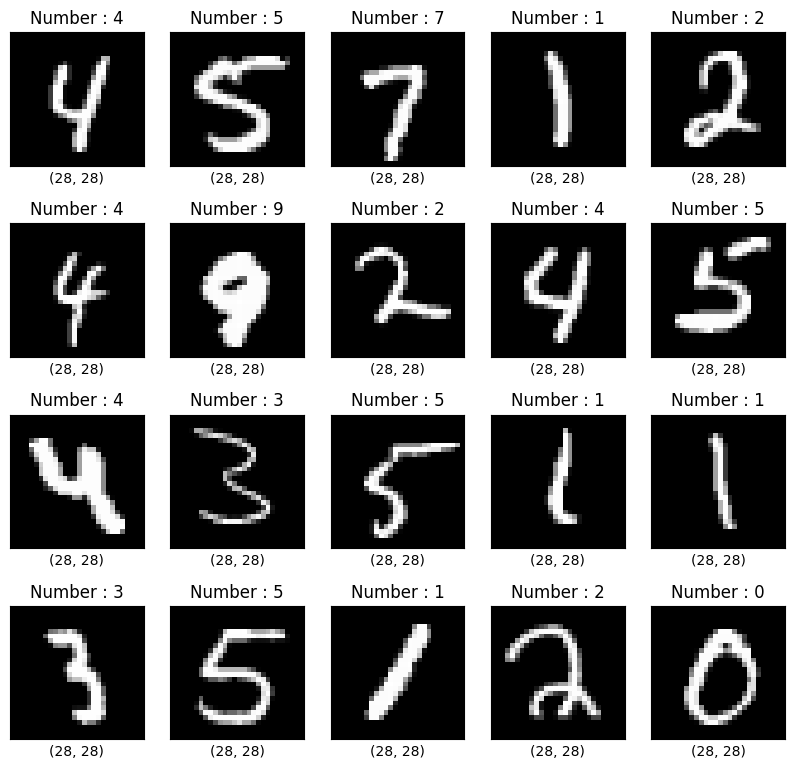

In [62]:
plt.figure(figsize=(10, 12))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Number : {y[i]}')
    plt.xlabel(X[i].shape)
    plt.xticks([])
    plt.yticks([])
    plt.plot()

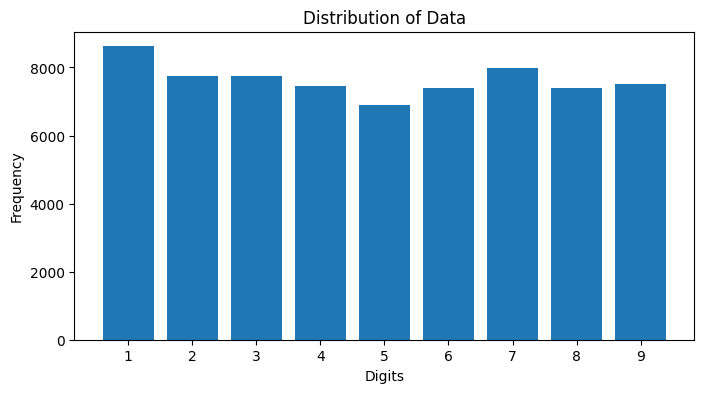

In [63]:
count = np.bincount(y)[1:]

plt.figure(figsize=(8, 4))
plt.bar(x=np.arange(9), height=count)
plt.xticks(ticks=np.arange(9), labels=np.arange(1, 10))
plt.title("Distribution of Data")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

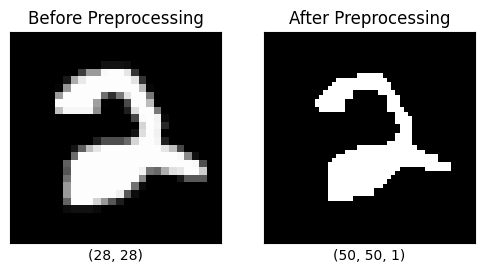

In [65]:
def image_preprocessing(image):  
    image = cv2.resize(image, (w, h))
    image = cv2.equalizeHist(image)
    _, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    binary_image = binary_image.reshape(w, h, 1)
    binary_image = binary_image / 255.0
    return binary_image

target = X[991]

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Before Preprocessing')
plt.xlabel(f'{target.shape}')
plt.imshow(target, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
target_pre = image_preprocessing(target)
plt.xlabel(f'{target_pre.shape}')
plt.imshow(target_pre, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [66]:
def preprocess_mnist_images(images):
    return np.array([image_preprocessing(img) for img in images])

X = np.array([image_preprocessing(img) for img in X])

In [67]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (75658, 50, 50, 1)
y shape: (75658,)


In [68]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.5, random_state=42)

In [69]:
dataGen = ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, zoom_range=.2, shear_range=.1, rotation_range=10)

dataGen.fit(X_train)

In [70]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [71]:
print(f'X_train : {X_train.shape}\ny_train : {y_train.shape}\n\nX_val: {X_val.shape}\ny_val: {y_val.shape}\n\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train : (60526, 50, 50, 1)
y_train : (60526, 10)

X_val: (7566, 50, 50, 1)
y_val: (7566, 10)

X_test: (7566, 50, 50, 1)
y_test: (7566, 10)


In [72]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(w, h, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.25),
    Dense(10, activation='softmax')
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,458 (876.79 KB)

 Trainable params: 224,458 (876.79 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(dataGen.flow(X_train, y_train), epochs=10, steps_per_epoch=500, validation_data=(X_val, y_val), shuffle=1)    

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6000 - loss: 1.1710 - val_accuracy: 0.9428 - val_loss: 0.1745
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8791 - loss: 0.3840 - val_accuracy: 0.9588 - val_loss: 0.1264
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9085 - loss: 0.2863 - val_accuracy: 0.9701 - val_loss: 0.0974
Epoch 4/10
385/500 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9265 - loss: 0.2341

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9264 - loss: 0.2344 - val_accuracy: 0.9737 - val_loss: 0.0863
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9315 - loss: 0.2099 - val_accuracy: 0.9753 - val_loss: 0.0765
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9350 - loss: 0.2132 - val_accuracy: 0.9783 - val_loss: 0.0767
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9423 - loss: 0.1754 - val_accuracy: 0.9802 - val_loss: 0.0641
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9459 - loss: 0.1759 - val_accuracy: 0.9823 - val_loss: 0.0624
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9519 - loss: 0.1538 - val_accuracy: 0.9818 - val_loss: 0.0620
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9513 - loss: 0.1611 - val_accuracy: 0.9853 - val_loss: 0.0525


In [ ]:
model.save('./num_classifier_COMBINED.h5')

In [ ]:
model = tf.keras.models.load_model('./num_classifier_COMBINED.h5')

In [77]:
model.evaluate(X_test, y_test)

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0507


[0.054650548845529556, 0.9840074181556702]

In [78]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

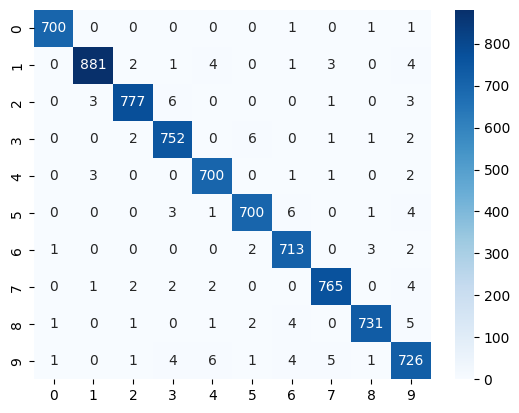

In [79]:
y_test_labels = [np.argmax(i) for i in y_test]
y_pred_labels = [np.argmax(i) for i in y_pred]


confusion_matrix = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_pred_labels)
seaborn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

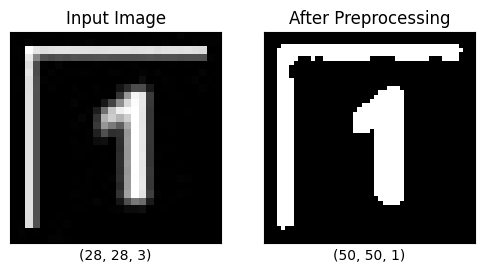

In [80]:
def image_preprocessing_input(image): 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = cv2.resize(image, (w, h))
    image = cv2.equalizeHist(image)
    _, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    binary_image = binary_image.reshape(w, h, 1)
    binary_image = binary_image / 255.0
    return binary_image

test_image = cv2.imread('/kaggle/input/printed-digits-dataset/assets/10/100.jpeg')
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(test_image, cmap='gray')
plt.xlabel(f'{test_image.shape}')
plt.xticks([])
plt.yticks([])

test_image_preprocessed = image_preprocessing_input(test_image)
plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
plt.imshow(test_image_preprocessed, cmap='gray')
plt.xlabel(f'{test_image_preprocessed.shape}')
plt.xticks([])
plt.yticks([])
plt.show()

In [81]:
test_image_preprocessed = np.expand_dims(test_image_preprocessed, axis=0)
test_image_preprocessed.shape

(1, 50, 50, 1)

In [82]:
y_pred = model.predict(test_image_preprocessed)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(f'Prediction for sample: {y_pred_labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Prediction for sample: [1]
